In [1]:
#Standard libraries for data analysis:
    
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm, skew
from scipy import stats
import statsmodels.api as sm
import seaborn as sns
# sklearn modules for data preprocessing:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE

#sklearn modules for Model Selection:
from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import uniform
from sklearn import linear_model, datasets
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
#sklearn modules for Model Evaluation & Improvement:
    
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import make_scorer, recall_score, log_loss
from sklearn.metrics import average_precision_score
from sklearn.metrics import plot_roc_curve
#Standard libraries for data visualization:
import seaborn as sn
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib 
%matplotlib inline
color = sn.color_palette()
import matplotlib.ticker as mtick
from IPython.display import display
pd.options.display.max_columns = None
from pandas.plotting import scatter_matrix
from sklearn.metrics import roc_curve
#Miscellaneous Utilitiy Libraries:
    
import random
import os
import re
import sys
import timeit
import string
import time
from datetime import datetime
from time import time
from dateutil.parser import parse
import joblib

In [2]:
os.getcwd()

'C:\\Users\\oscar'

In [3]:
os.chdir('C:\\Users\\oscar\Downloads')

In [4]:
dataset = pd.read_excel('dataset_alternative_processed.xlsx.xlsx')

In [5]:
y = dataset['Churn Value']

X = dataset.drop(['Churn Value'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1234)

In [6]:
from imblearn.under_sampling import RandomUnderSampler

# define undersample strategy
undersample = RandomUnderSampler(sampling_strategy='majority')

# fit and apply the transform
X_train, y_train = undersample.fit_resample(X_train, y_train)

print(f'''Shape of X before SMOTE: {X.shape}
Shape of X after SMOTE: {X_train.shape}''')

print('\nBalance of positive and negative classes (%):')
y_train.value_counts(normalize=True) * 100

Shape of X before SMOTE: (7043, 31)
Shape of X after SMOTE: (2990, 31)

Balance of positive and negative classes (%):


1    50.0
0    50.0
Name: Churn Value, dtype: float64

Optimal number of features : 3


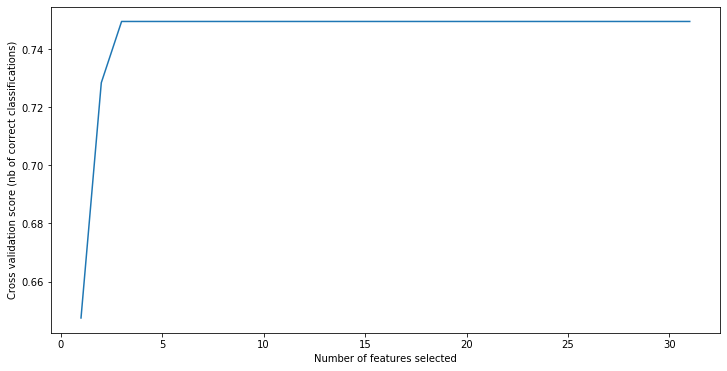

In [16]:
from sklearn.feature_selection import RFECV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold

rfecv = RFECV(estimator= SVC(kernel = 'linear'))



pipeline = Pipeline([('Feature Selection', rfecv), ('Model', SVC())])
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=36851234)
n_scores = cross_val_score(pipeline, X_train, y_train, scoring='f1', cv=cv, n_jobs=-1)
np.mean(n_scores)

pipeline.fit(X_train,y_train)

print("Optimal number of features : %d" % rfecv.n_features_)

    
rfecv.support_
rfecv_df = pd.DataFrame(rfecv.ranking_,index=X.columns,columns=["Rank"]).sort_values(by="Rank",ascending=True)
rfecv_df.head()

import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [17]:
rfecv_df

,Rank
Contract_One year,1
Dependents_1,1
Contract_Two year,1
Tenure Months,2
Streaming Movies_No internet service,3
Streaming TV_No internet service,4
Total Charges,5
Monthly Charges,6
Tech Support_No internet service,7
Multiple Lines_Yes,8


## Recreate Dataset with the optimal features

In [36]:
dataset = pd.read_excel('dataset_alternative_processed.xlsx.xlsx')

In [37]:
dataset = dataset[['Contract_One year','Dependents_1','Contract_Two year', 'Churn Value']]

In [33]:
dataset

,Contract_One year,Dependents_1,Contract_Two year
0,0,0,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
7038,0,0,1
7039,1,1,0
7040,1,1,0
7041,0,1,0


In [38]:
y = dataset['Churn Value']

X = dataset.drop(['Churn Value'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1234)

# define undersample strategy
undersample = RandomUnderSampler(sampling_strategy='majority')

# fit and apply the transform
X_train, y_train = undersample.fit_resample(X_train, y_train)

### Hyperparameters

In [44]:

svc_param_grid = { 'gamma': [ 0.001, 0.01, 0.1, 1],
                  'C': [0.01,0.1,1, 10, 100,200],
                     }

gsSVMC = GridSearchCV(SVC(),param_grid = svc_param_grid, cv=5, scoring="f1", n_jobs= -1, verbose = 1)

gsSVMC.fit(X_train,y_train)

gsSVMC.best_params_

Fitting 5 folds for each of 24 candidates, totalling 120 fits


{'C': 0.01, 'gamma': 1}

## Final Model

ROC AUC: 0.7618150817639309
f1_score: 0.6187192118226601
accuracy: 0.7253371185237757
precision: 0.48985959438377535
recall: 0.839572192513369
[[708 327]
 [ 60 314]]
              precision    recall  f1-score   support

           0       0.92      0.68      0.79      1035
           1       0.49      0.84      0.62       374

    accuracy                           0.73      1409
   macro avg       0.71      0.76      0.70      1409
weighted avg       0.81      0.73      0.74      1409



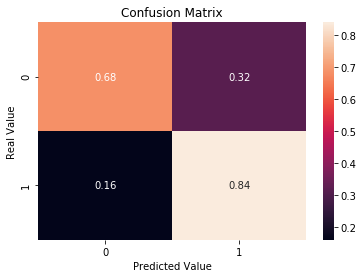

In [46]:
#SUPPORT VECTOR MACHINE


# Applying Support Vector Machine algorithm
from sklearn.svm import SVC  
svclassifier = SVC(C=0.01, gamma=1)  
svclassifier.fit(X_train, y_train)  
# Predicting part, applying the model to predict
y_pred = svclassifier.predict(X_test)  

print("ROC AUC:",roc_auc_score(y_test, y_pred))
print("f1_score:",f1_score(y_test, y_pred))
print("accuracy:",metrics.accuracy_score(y_test, y_pred))
print("precision:",metrics.precision_score(y_test, y_pred))
print("recall:",metrics.recall_score(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))

# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, y_pred, normalize='true'), annot=True, ax=ax)
ax.set_title('Confusion Matrix')
ax.set_ylabel('Real Value')
ax.set_xlabel('Predicted Value')

plt.show()